# MONKEYPOX PREDICTION

## BUSINESS UNDERSTANDING

### __Overview__

Monkeypox, according to the Centers for Disease Control and Prevention, is an uncommon disease caused by infection with the monkeypox virus. Monkeypox virus is part of the same family of viruses as variola virus, the virus that causes smallpox. Monkeypox symptoms are similar to smallpox symptoms, but milder, and monkeypox is rarely fatal.
Monkeypox was discovered in 1958 when two outbreaks of a pox-like disease occurred in colonies of monkeys kept for research. Despite being named “monkeypox,” the source of the disease remains unknown. However, African rodents and non-human primates (like monkeys) might harbor the virus and infect people.

The first human case of monkeypox was recorded in 1970. Prior to the 2022 outbreak in May, monkeypox had been reported in people in several central and western African countries. Previously, almost all monkeypox cases in people outside of Africa were linked to international travel to countries where the disease commonly occurs or through imported animals. These cases occurred on multiple continents.

```Transmission```: Monkeypox is a viral zoonosis (virus transmitted to humans from animals)It is transmitted through close contact with an infected person or animal, body fluids, respiratory droplets and contaminated materials such as bedding.

### __Problem Statement__

As more cases of monkeypox emerge, the world becomes increasingly concerned, as they do not want a repeat of what happened not too long ago, when the infamous Covid-19 broke out and altered the world as we know it. Faced with the reality that such viral diseases can actually shut down the planet, the organization must develop ways to reduce the spread of this disease, enter the Health authorities in the United Kingdom, they have established an incident management team to coordinate the extensive contact tracing  in regards to how quickly the virus can be transferred and, worse, mutate into a more lethal variant.

On July 23, the World Health Organization declared the outbreak “a public health emergency of international concern.” Another thing you should know about monkeypox is that it is extremely unpleasant. The current strain has a 1% mortality rate, and as of this writing, there have been three deaths reported in outbreaks outside of Africa, and five deaths in African countries where the disease is endemic, since the beginning of the year.
The West African strain of the monkeypox virus is associated with milder disease and fewer deaths than the Central African strain.

Even if the chances of death are low, patients with monkeypox have reported how painful and debilitating the disease is. "People may experience flu-like symptoms at first, such as fever and headache, but as the disease progresses, you get a multi-stage rash, lesions can develop in your mouth, feet, and genital region, and these develop into pus-filled blisters."Symptoms can appear between five and 21 days after infection, though the average incubation period is 6 to 13 days. For the first few days, there are headaches, fever, muscle aches, and fatigue.

As students of the Incident Management team we have been tasked to create a model to accurately identify potential infected persons in order to make contact tracing faster and more efficient, thereby halting the spread.

### __Proposed Solution__

One proposed solution is to cultivate the use of data in attempting to predict whether or not a person has monkeypox in order to make contact tracing easier.

### __Specific Objectives__

* To predict whether a patient is negative or positive for monkeypox based on the symptoms they exhibit 
* To analyze the various variables such as Sore Throat,Penile Oedema, Oral Lesions ,Systemic illness and STIs and know their relationship with monkeypox 

### __Research Questions__

* Which model best predicts monkeypox disease?
* Which symptom has the highest correlation to monkeypox?
* Which symptom has the lowest correlation to monkeypox?

### __Success Criteria__

Tentatively, the study will be judged a success if, we build a model(****We'll add it once we figure out which kind of models we will use. Since we are using at least two models****) to predict monkeypox with an accuracy,precision and recall of 70% or more in classification



## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score ,accuracy_score, plot_confusion_matrix, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN 
import numpy as np
import joblib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
# Loading the data using pandas into mp {Monkey Pox}

# Index_col sets the index to be the patient id as there is no need to have more than one unique identifiers.

mp = pd.read_csv('DATA.csv')

## DATA UNDERSTANDING

### __Overview__

We are using a SYNTHETIC dataset generated from a study published by the British Medical Journal. It is a description of the clinical features and novel presentations of human monkeypox during the outbreak of 2022 in central London. 

The data has already been loaded in the above code cell.

In [3]:
# preview of the first 5 rows
mp.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [4]:
# Checking the summary of the data

mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                25000 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [5]:
# checking for duplicates 
x = mp[mp.duplicated()]
x

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox


In [6]:
# viewing the column names of the dataset 

mp.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [7]:
# checking the summary statistics of the data
mp.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,4,2,2,2,2,2,2,2,2,2
top,P0,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [8]:
# shape of the data
mp.shape

(25000, 11)

__Summary__

* Our data has 25,000 rows and 11 columns
* The data has 8 columns of dtype ```Bool``` and 2 columns of dtype ```object```.
* There are no missing columns in the data.
* There are no duplicates in the data.
* The following are the columns in our data;
    * Systemic Illness 
    * Rectal Pain 
    * Sore Throat 
    * Penile Oedema
    * Oral Lesions 
    * Solitary Lesion 
    * Swollen Tonsils 
    * HIV Infection
    * Sexually Transmitted Infection
    * MonkeyPox

Since the data has no duplicates and missing values, we can go ahead and do Exploratory Data Analysis to gain more insights from the data.

In [9]:
# let us drop patient id as it does not provide us with any relevant data to use.
mp.drop(axis= 1, columns=['Patient_ID'],inplace= True)


In [10]:
# Making a list of all the bool columns to use in get_dummies later

col = list(mp.columns)

col.remove('Systemic Illness')
col

['Rectal Pain',
 'Sore Throat',
 'Penile Oedema',
 'Oral Lesions',
 'Solitary Lesion',
 'Swollen Tonsils',
 'HIV Infection',
 'Sexually Transmitted Infection',
 'MonkeyPox']

### Exploratory Data Analysis

__UNIVARIATE ANALYSIS__

__Feature columns__

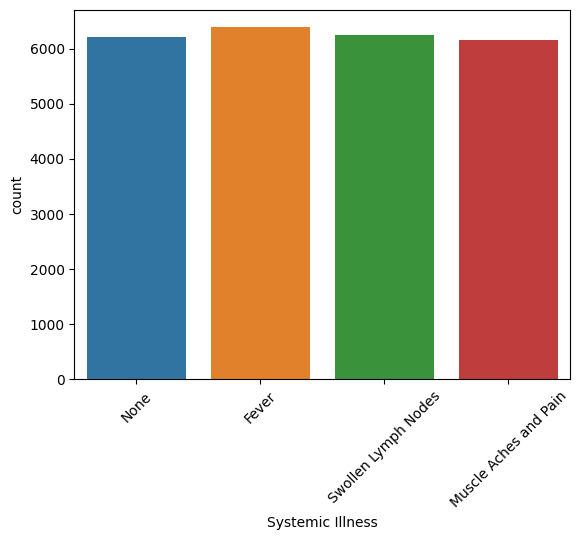

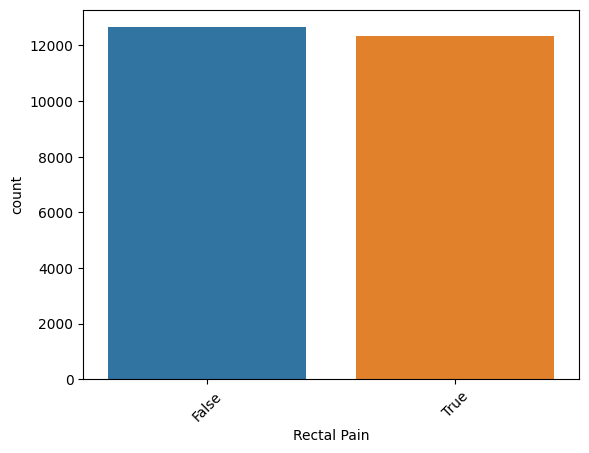

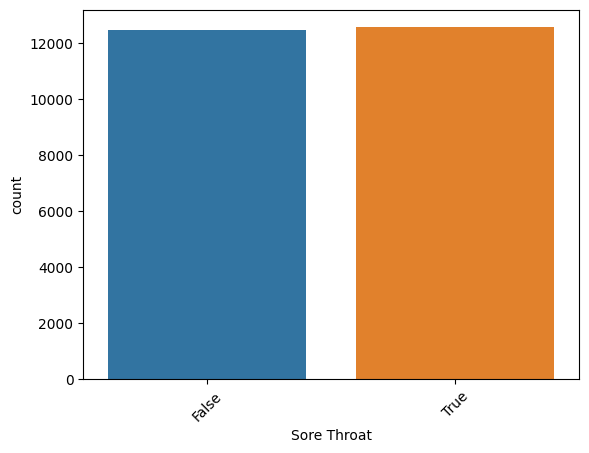

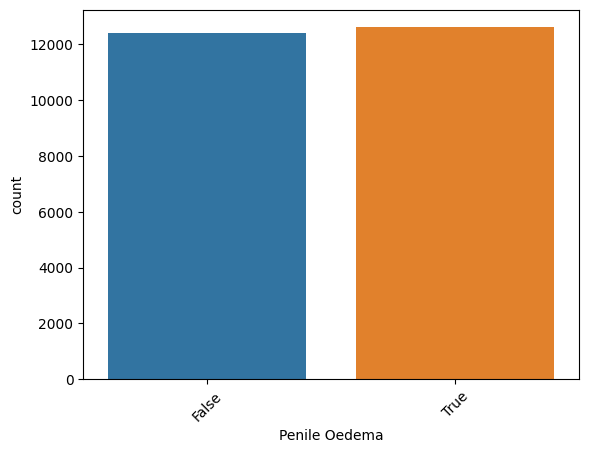

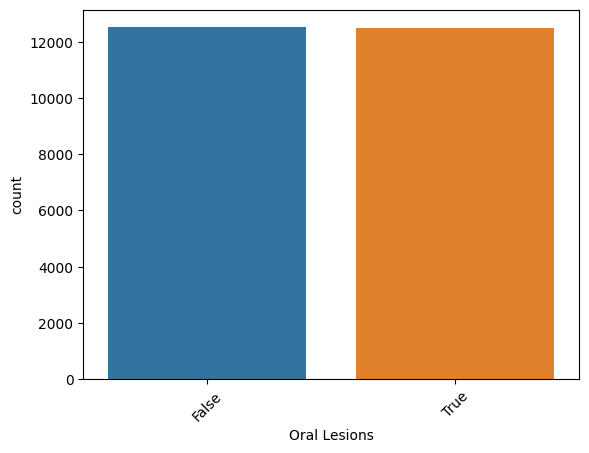

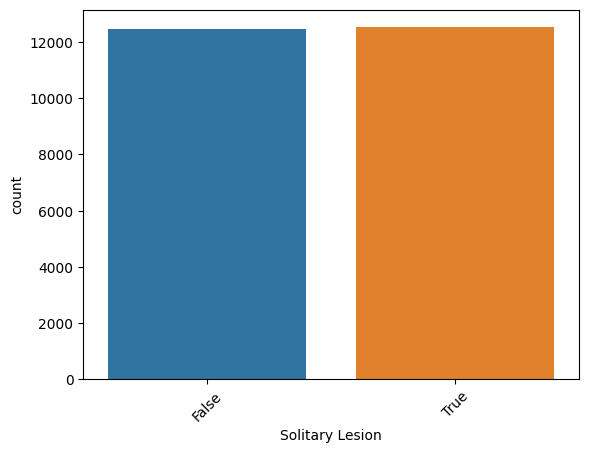

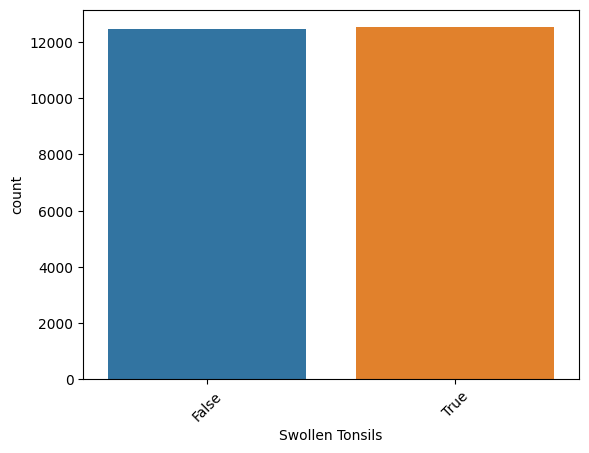

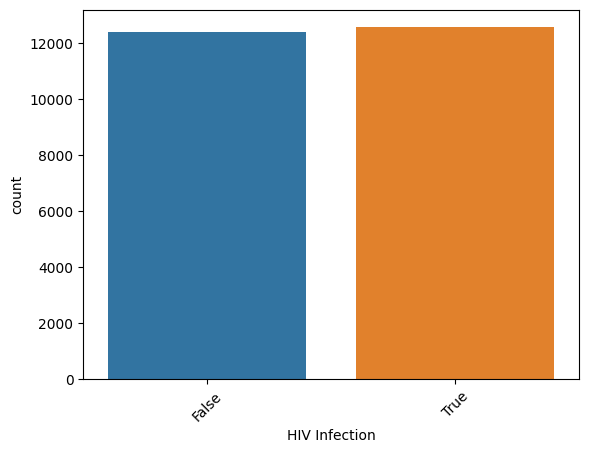

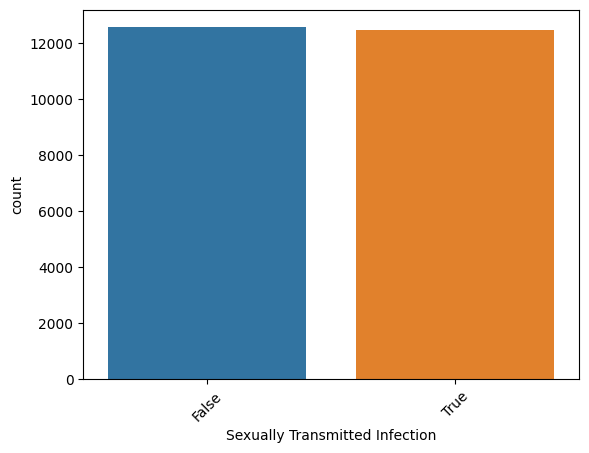

In [11]:
for column in mp.columns:
    if column != 'MonkeyPox':
        plt.figure()
        sns.countplot(x=mp[column])
        plt.xticks(rotation = 45)
        plt.show()

__Target column__

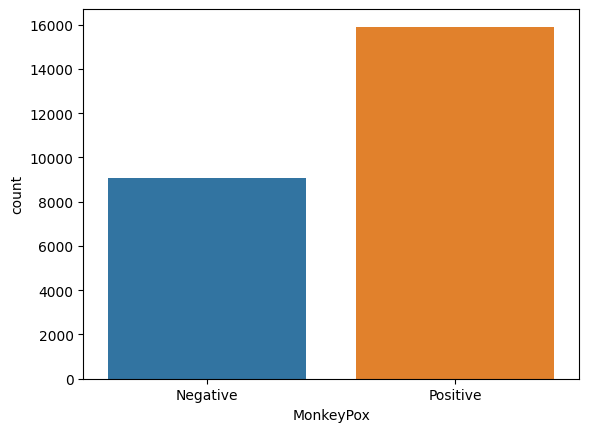

In [12]:
sns.countplot(x = mp["MonkeyPox"]);

__Univariate Analysis summary__

* From the above, all symptoms have a uniform distribution based on whether it is true or false.
* For the systemic illnesses, fever has the highest frequency.
* For the target column, the number of those with monkey pox is higher than those without the monkeypox therefore there is a class imbalance in our target column.

__BIVARIATE ANALYSIS__



In [13]:
# Grouping the data by monkey pox in order to find the sum of various symptoms baseed on MonkeyPox
values = mp.groupby(by="MonkeyPox").sum().reset_index()
values

,MonkeyPox,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,Negative,3643,4184,4214,4228,4330,4478,3697,3784
1,Positive,8702,8370,8398,8258,8197,8055,8887,8662


***HIV Infection vs MonkeyPox***

MonkeyPox
Negative    3697
Positive    8887
Name: HIV Infection, dtype: int64

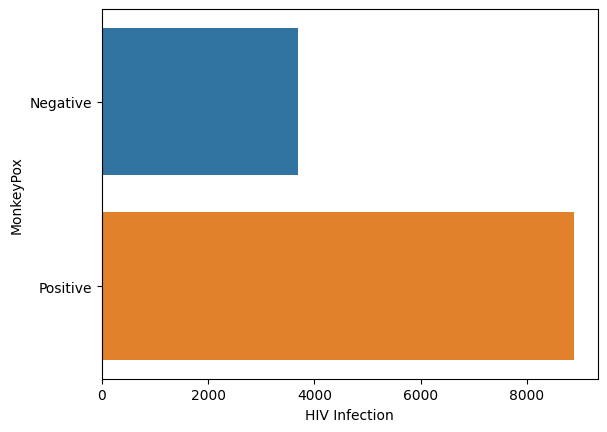

In [14]:

ax = sns.barplot(x = "HIV Infection", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["HIV Infection"]

***Rectal Pain vs MonkeyPox***

MonkeyPox
Negative    3643
Positive    8702
Name: Rectal Pain, dtype: int64

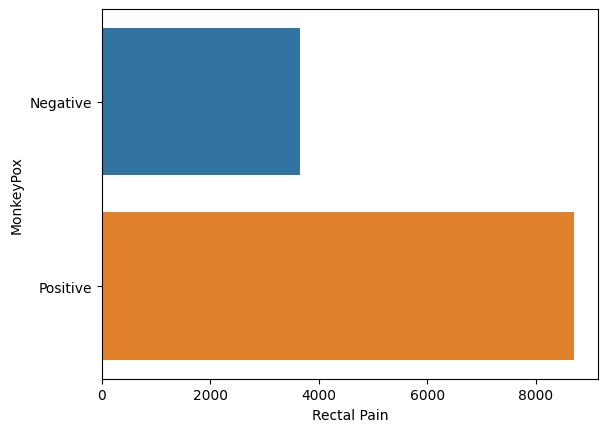

In [15]:
ax = sns.barplot(x = "Rectal Pain", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Rectal Pain"]

***Sore Throat vs MonkeyPox***

MonkeyPox
Negative    4184
Positive    8370
Name: Sore Throat, dtype: int64

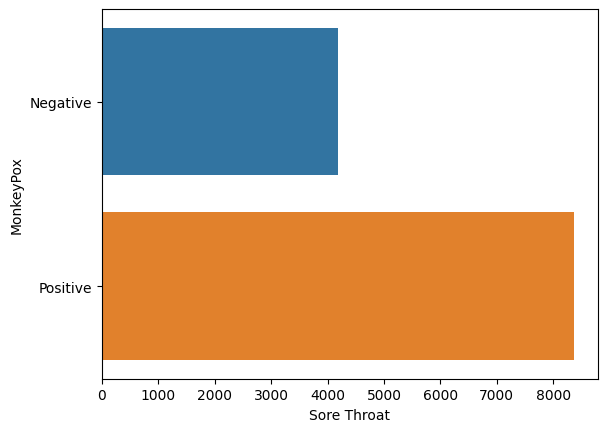

In [16]:
ax = sns.barplot(x = "Sore Throat", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Sore Throat"]

***Penile Oedema vs MonkeyPox***

MonkeyPox
Negative    4214
Positive    8398
Name: Penile Oedema, dtype: int64

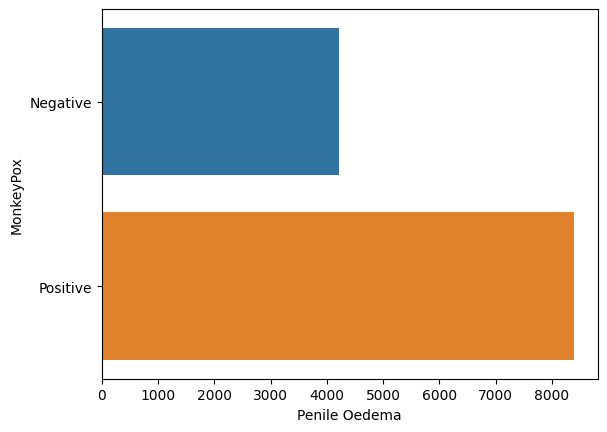

In [17]:
ax = sns.barplot(x = "Penile Oedema", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Penile Oedema"]

***Oral Lesions vs MonkeyPox***

MonkeyPox
Negative    4228
Positive    8258
Name: Oral Lesions, dtype: int64

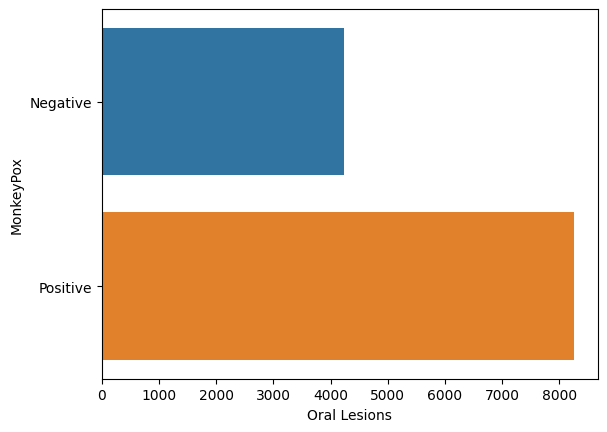

In [18]:
ax = sns.barplot(x = "Oral Lesions", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Oral Lesions"]

***Solitary Lesion vs MonkeyPox***

MonkeyPox
Negative    4330
Positive    8197
Name: Solitary Lesion, dtype: int64

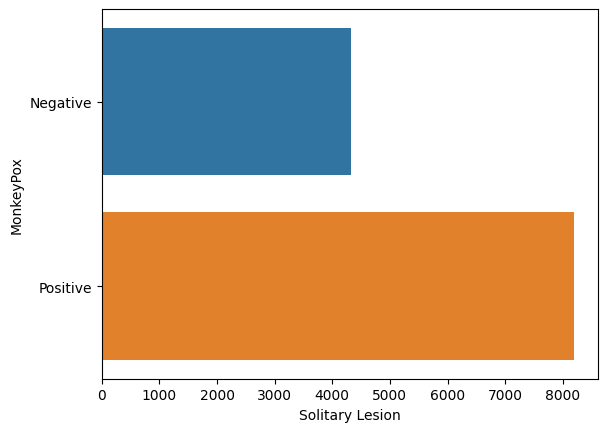

In [19]:
sns.barplot(x = "Solitary Lesion", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Solitary Lesion"]

***Swollen Tonsils vs MonkeyPox***

MonkeyPox
Negative    4478
Positive    8055
Name: Swollen Tonsils, dtype: int64

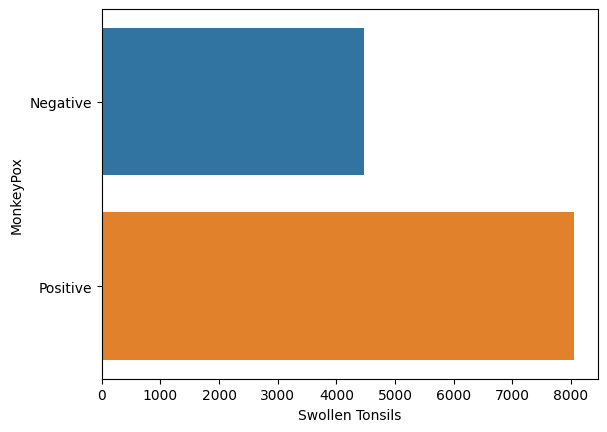

In [20]:
sns.barplot(x = "Swollen Tonsils", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Swollen Tonsils"]

***Sexually Transmitted Infection vs MonkeyPox***

MonkeyPox
Negative    3784
Positive    8662
Name: Sexually Transmitted Infection, dtype: int64

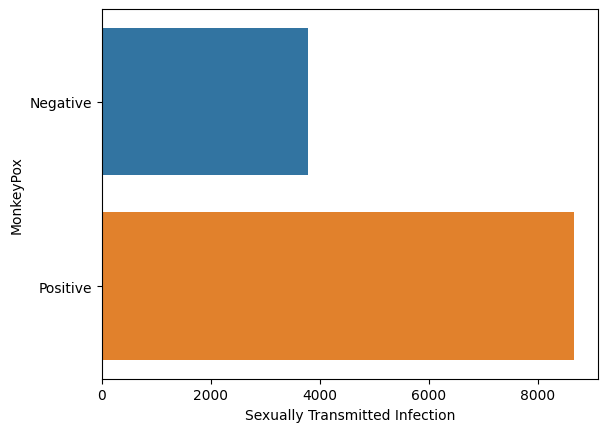

In [21]:
sns.barplot(x = "Sexually Transmitted Infection", y = "MonkeyPox", data = values)
mp.groupby("MonkeyPox").sum()["Sexually Transmitted Infection"]

__Bivariate Analysis Summary__

* People with the symptoms of ```HIV Infection```, ```Rectal Pain``` and ```Sexually Transmitted Infection``` have a high chance of being MonkeyPox positive.

__MULTIVARIATE ANALYSIS__

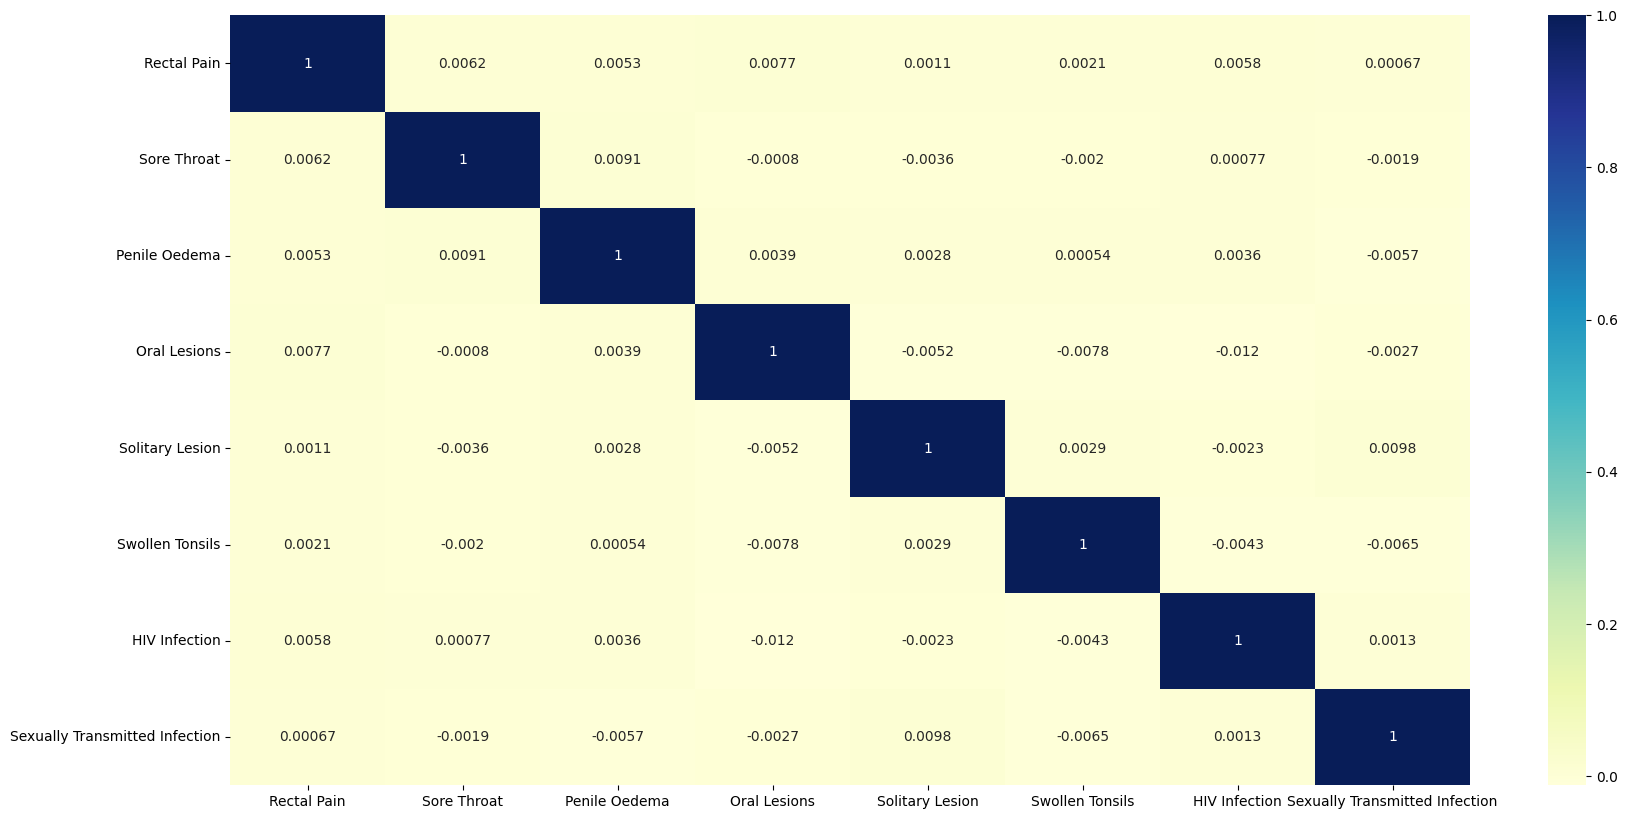

In [22]:
plt.figure(figsize = (20, 10))
var = mp.corr()
sns.heatmap(var, annot = True, cmap = "YlGnBu");

## DATA PREPARATION

In [23]:
# Checking on the uniue value counts in Systemic Illness
mp['Systemic Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64

In [24]:
# Reducing ambiguity in the systemic illness column we change none to No systemic Illness

mp['Systemic Illness'].replace(to_replace= 'None',value= 'No Systemic Illness',inplace= True)


In [25]:
# Confirming change
mp['Systemic Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
No Systemic Illness      6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64

From the above info we can see that all the columns have only two unique values meaning converting to int will not be as complicated.

Systemic illness has the most with 4.

data cleaning will be relatievly easy as the data has no missing values and no duplicates.

Only task is type casting.


In [26]:
# type casting Systemic illness by using get dummies
df = pd.get_dummies(data= mp, columns= ['Systemic Illness'],drop_first= False)
# dropping every other column to isolate the systemic illness ...will concat later.
df_Systemic = df.drop(columns= col,axis = 1)
# df_Systemic = df_Systemic.drop(columns= ['Systemic Illness_No Systemic Illness'],axis = 1)
df_Systemic

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_No Systemic Illness,Systemic Illness_Swollen Lymph Nodes
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
24995,0,0,1,0
24996,1,0,0,0
24997,0,0,1,0
24998,0,0,0,1


In [27]:
df_d = pd.get_dummies(data = mp, columns= col, drop_first= True)
df_d

,Systemic Illness,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
0,No Systemic Illness,0,1,1,1,0,1,0,0,0
1,Fever,1,0,1,1,0,0,1,0,1
2,Fever,0,1,1,0,0,0,1,0,1
3,No Systemic Illness,1,0,0,0,1,1,1,0,1
4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
24995,No Systemic Illness,1,1,0,1,1,0,0,1,1
24996,Fever,0,1,1,0,1,1,1,1,1
24997,No Systemic Illness,1,1,0,0,1,1,0,0,1
24998,Swollen Lymph Nodes,0,1,0,1,1,1,0,0,0


In [28]:
# Dropping Systemic illness as its already dummied out

df_d.drop(axis = 1, columns= ['Systemic Illness'] ,inplace = True)


In [29]:
# Column names will have to be changed but that can be done in one go
# first we finish up on converting the column data types t a usable state.
df_d.head()


,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
0,0,1,1,1,0,1,0,0,0
1,1,0,1,1,0,0,1,0,1
2,0,1,1,0,0,0,1,0,1
3,1,0,0,0,1,1,1,0,1
4,1,1,1,0,0,1,1,0,1


In [30]:
df_clean = pd.concat([df_Systemic,df_d], axis = 1,join= 'inner')
df_clean

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_No Systemic Illness,Systemic Illness_Swollen Lymph Nodes,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
0,0,0,1,0,0,1,1,1,0,1,0,0,0
1,1,0,0,0,1,0,1,1,0,0,1,0,1
2,1,0,0,0,0,1,1,0,0,0,1,0,1
3,0,0,1,0,1,0,0,0,1,1,1,0,1
4,0,0,0,1,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,0,1,0,1,1,0,1,1,0,0,1,1
24996,1,0,0,0,0,1,1,0,1,1,1,1,1
24997,0,0,1,0,1,1,0,0,1,1,0,0,1
24998,0,0,0,1,0,1,0,1,1,1,0,0,0


In [31]:
list(df_clean.columns)

['Systemic Illness_Fever',
 'Systemic Illness_Muscle Aches and Pain',
 'Systemic Illness_No Systemic Illness',
 'Systemic Illness_Swollen Lymph Nodes',
 'Rectal Pain_True',
 'Sore Throat_True',
 'Penile Oedema_True',
 'Oral Lesions_True',
 'Solitary Lesion_True',
 'Swollen Tonsils_True',
 'HIV Infection_True',
 'Sexually Transmitted Infection_True',
 'MonkeyPox_Positive']

In [32]:
df_clean.rename(columns={'Systemic Illness_Fever':'SI_Fever',
                        'Systemic Illness_Muscle Aches and Pain':'SI_Muscle_Aches&Pain',
                        'Systemic Illness_Swollen Lymph Nodes':'SI_Swollen_Lymph_Nodes',
                        'Systemic Illness_No Systemic Illness': 'SI_None',
                        'Rectal Pain_True':'Rectal_Pain',
                        'Sore Throat_True':'Sore_Throat',
                        'Penile Oedema_True':'Penile_Oedema',
                        'Oral Lesions_True':'Oral_Lesions',
                        'Solitary Lesion_True':'Solitary_Leision',
                        'Swollen Tonsils_True':'Swollen_Tonsils',
                        'HIV Infection_True':'HIV_Infection',
                        'Sexually Transmitted Infection_True':'STI',
                        'MonkeyPox_Positive':'Target'},inplace=True)
df_clean.head(1)

,SI_Fever,SI_Muscle_Aches&Pain,SI_None,SI_Swollen_Lymph_Nodes,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
0,0,0,1,0,0,1,1,1,0,1,0,0,0


In [33]:
mp.head(1)

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,No Systemic Illness,False,True,True,True,False,True,False,False,Negative


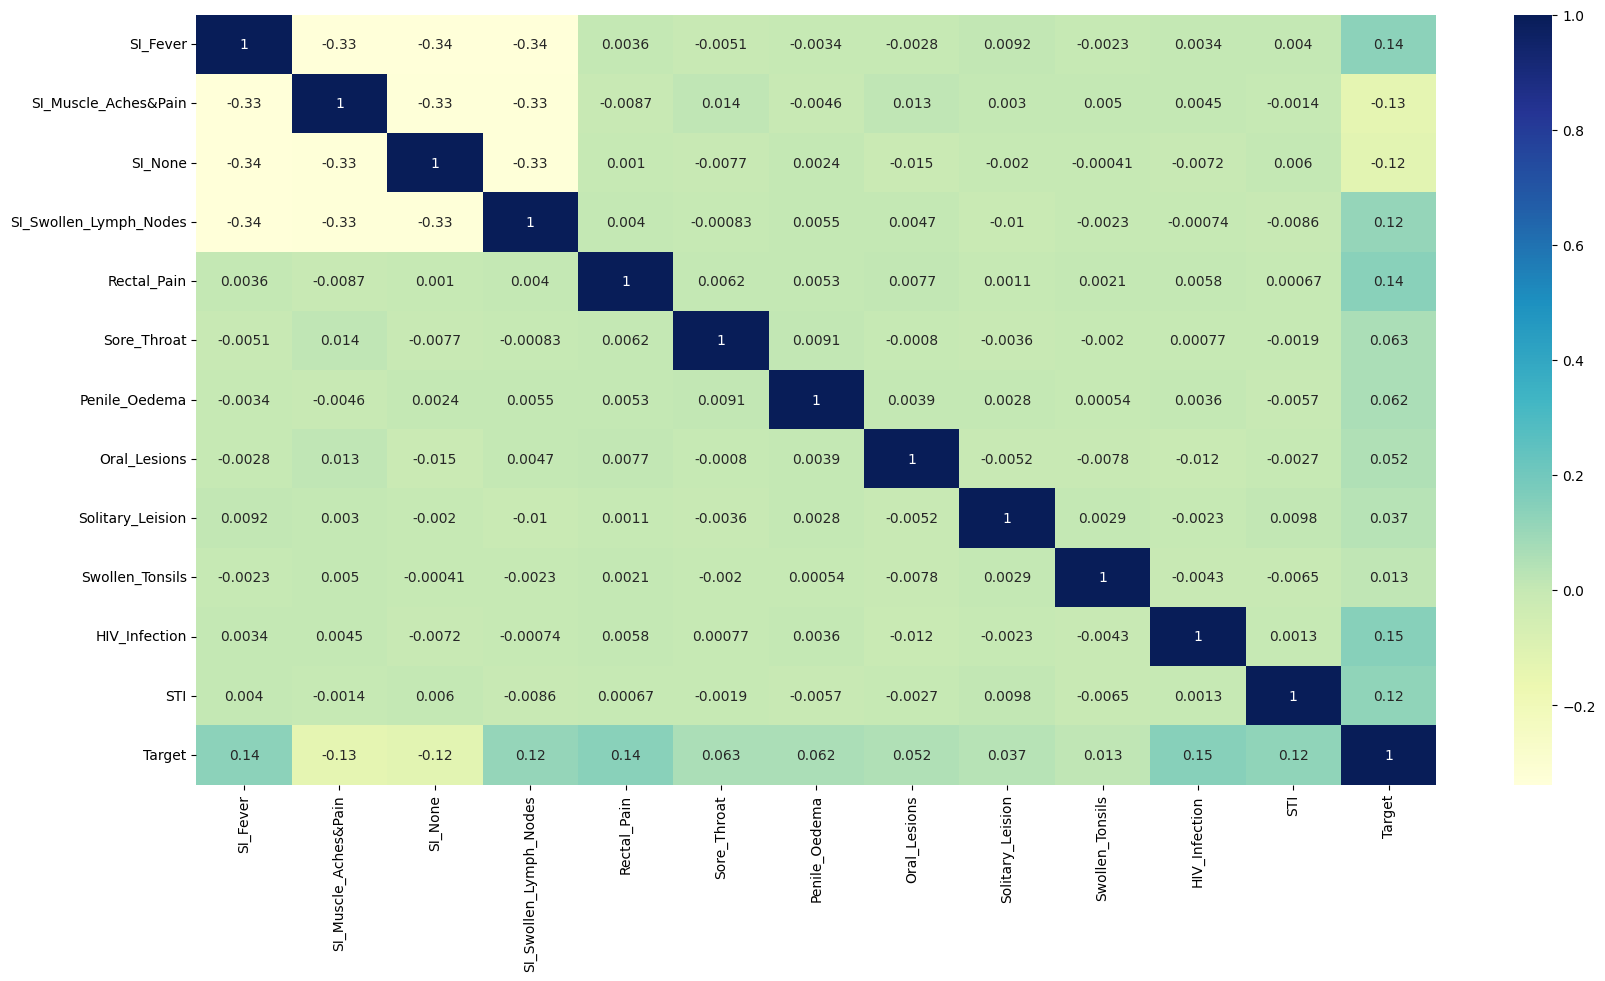

In [34]:
plt.figure(figsize = (20, 10))
var = df_clean.corr()
sns.heatmap(var, annot = True, cmap = "YlGnBu");

In [35]:
# splitting the data into X [predictors] and y [target]
X = df_clean.drop(columns= ['Target'],axis = 1)
y = df_clean['Target']

# Random state for reapetability, test size of 30% as it is the optimum
# Stratify is used to ensure the test and train data have the same ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size= 0.25)

## MODELING

In [36]:
#checking class balance in the trainaing target variable
print(y_train.value_counts())
print('\n')

#checking class balance in the trainaing target variable
print(y_test.value_counts())

1    11921
0     6829
Name: Target, dtype: int64


1    3988
0    2262
Name: Target, dtype: int64


# Base Model

In [37]:
#function to train model and return the score
def model_trainer(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    pre = model.predict(X_te)
    precision =precision_score(y_te, pre)
    recall =recall_score(y_te, pre)
    accuracy =accuracy_score(y_te, pre)
    f1 = f1_score(y_te, pre)
    
    return {'precision':precision,
            'recall_score':recall,
            'accuracy_score':accuracy,
            'f1_score':f1}

In [38]:
#train and get the score of the base model without handling the imbalance in the class and see how the model performs
base_tree =  DecisionTreeClassifier()
model_trainer(base_tree, X_train, y_train,X_test,y_test)

{'precision': 0.7079133604975337,
 'recall_score': 0.8277331995987964,
 'accuracy_score': 0.67216,
 'f1_score': 0.7631487689284476}

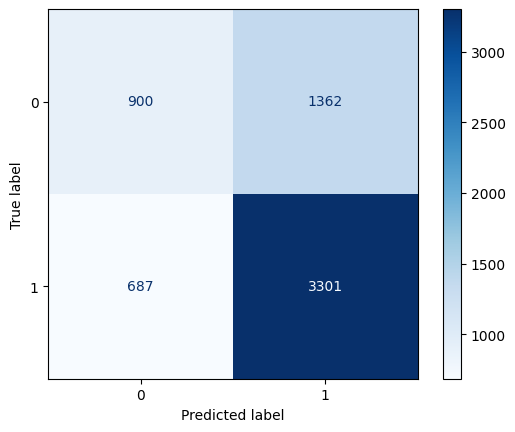

In [39]:
#visualize the confusion matrix
cnf_matrix  = plot_confusion_matrix(base_tree, X_test, y_test, cmap=plt.cm.Blues)

In [40]:
#balance the training classes and see the effect on the model using SMOTE

X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

print(y_train_smote.value_counts())


1    11921
0    11921
Name: Target, dtype: int64


In [41]:
#retrain the model with the model with the balanced classes
base_tree_smote = DecisionTreeClassifier()
Basemodel_balanced = model_trainer(base_tree_smote, X_train_smote, y_train_smote,X_test,y_test)
Basemodel_balanced

{'precision': 0.744378698224852,
 'recall_score': 0.6308926780341023,
 'accuracy_score': 0.62624,
 'f1_score': 0.6829533116178067}

In [42]:
#retrain the model with the model with the balanced classes but using adasyn

X_train_ada,y_train_ada = ADASYN(random_state= 0).fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

1    11921
0    11921
Name: Target, dtype: int64


In [43]:
base_tree_ada = DecisionTreeClassifier(random_state=0,)
Basemodel_balanced_ada = model_trainer(base_tree_ada, X_train_ada, y_train_ada,X_test,y_test)
Basemodel_balanced_ada

{'precision': 0.7488030641557613,
 'recall_score': 0.5882647943831495,
 'accuracy_score': 0.61136,
 'f1_score': 0.6588962224406685}

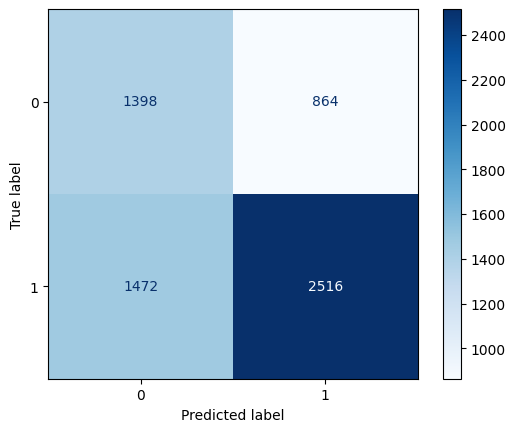

In [44]:
#visualize the confusion matrix
cnf_matrix  = plot_confusion_matrix(base_tree_smote, X_test, y_test, cmap=plt.cm.Blues)

In [45]:
#function to tune the model and find best parameters for the DecisionTreeClassifier using gridSearchCv
def grid_search(model, parms, X_tr, y_tr):
    gs_tree = GridSearchCV(model, parms, cv=3)
    gs_tree.fit(X_tr, y_tr)

    return gs_tree.best_params_

In [46]:
#balanced class best perameters
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [20,21,27,33,35],
    'min_samples_split': [23,25,27,31,33],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
  }
grid_search(DecisionTreeClassifier(),param_grid, X_train_smote, y_train_smote)


{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 33}

In [47]:
dtree_par =  DecisionTreeClassifier(criterion= 'gini', max_depth = 33, min_samples_split= 23, min_samples_leaf=1)
DecisionTree = model_trainer(dtree_par, X_train_smote,y_train_smote, X_test,y_test)
DecisionTree

{'precision': 0.744378698224852,
 'recall_score': 0.6308926780341023,
 'accuracy_score': 0.62624,
 'f1_score': 0.6829533116178067}

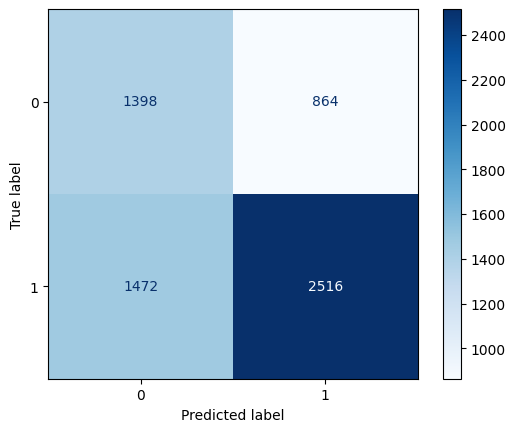

In [48]:
cnf_matrix  = plot_confusion_matrix(dtree_par, X_test, y_test, cmap=plt.cm.Blues)

The model recall score increased meaning more positive patients were identified but there are still many wrongly classified petients too 


In [49]:
#evaluating the two more models and see if they perform better then the DecisionTreeClassifier
# these two are LogisticRegression() and KNeighborsClassifier()

logreg = LogisticRegression()
knn_ = KNeighborsClassifier()


In [50]:
models = [logreg,knn]
scores=[]
recall=[]


NameError: name 'knn' is not defined

In [ ]:
# best hyperparameter for KNeighbors

pipe = Pipeline([('sc',StandardScaler()),
                    ('knn',knn_)
                               
                ])
range_neig = [35,36,37,38,39]
range_leaf = [1,2,3,4,5]
grid_params = [{
               'knn__n_neighbors':range_neig,
               'knn__leaf_size':range_leaf,
               'knn__algorithm':['auto','kd_tree'],
                'knn__p': [1,2,3]}]

gs = GridSearchCV(estimator= pipe, param_grid= grid_params, cv= 10,scoring='precision',error_score='raise')

gs.fit(X_train,y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)
print('_________')
# Best params
print('\nBest params:\n', gs.best_params_)
print('_________')
y_pred = gs.predict(X_test)

print(precision_score(y_true= y_test,y_pred= y_pred))

In [ ]:
# Best hyperparameters for LogisticRegression
pipe = Pipeline([('sc',StandardScaler()),
                    ('logreg',LogisticRegression(random_state=0))
                               
                ])
C_range = list(np.arange(0,0.05,0.01))
grid_params = [{
               'logreg__penalty':['l1', 'l2', 'elasticnet', 'none'],
               'logreg__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
               'logreg__C':C_range
                }]

gs = GridSearchCV(estimator= pipe, param_grid= grid_params, cv= 10,scoring='precision')

gs.fit(X_train_smote,y_train_smote)

# Best accuracy
print('Best precision: %.3f' % gs.best_score_)
print('_________')
# Best params
print('\nBest params:\n', gs.best_params_)

y_pred = gs.predict(X_test)
print('_________')
print(precision_score(y_true= y_test,y_pred= y_pred))

In [ ]:
pipe = Pipeline([('sc',StandardScaler()),
                    ('Dtr',DecisionTreeRegressor(random_state=0))
                               
                ])
Impurity_range = list(np.arange(0,0.3,0.1))
grid_params = [{
               'Dtr__criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'Dtr__splitter':['random'],
               'Dtr__max_features':['sqrt',1],
               'Dtr__max_leaf_nodes':[12,13]
               }]

gs = GridSearchCV(estimator= pipe, param_grid= grid_params, cv= 10,scoring='precision')

gs.fit(X_train,y_train)

# Best accuracy
print('Best precision: %.3f' % gs.best_score_)
print('_________')
# Best params
print('\nBest params:\n', gs.best_params_)
print('_________')
y_pred = gs.predict(X_test)

print(precision_score(y_true= y_test,y_pred= y_pred))

In [15]:
pipe = Pipeline([('sc',StandardScaler()),
                    ('Rfc',RandomForestClassifier(random_state=0,))
                               
                ])
min_range = list(np.arange(0.08,0.14,0.02))
grid_params = [{
               'Rfc__n_estimators':[50,100],
               'Rfc__min_samples_leaf':min_range,
               'Rfc__max_features':['sqrt','log2'],
               'Rfc__max_leaf_nodes':[12,13],
               'Rfc__bootstrap':[True,False]
               }]

gs = GridSearchCV(estimator= pipe, param_grid= grid_params, cv= 10,scoring='precision')

gs.fit(X_train,y_train)

# Best accuracy
print('Best precision: %.3f' % gs.best_score_)
print('_________')
# Best params
print('\nBest params:\n', gs.best_params_)
print('_________')

y_pred = gs.predict(X_test)

print('_________')

print(precision_score(y_true= y_test,y_pred= y_pred))

NameError: name 'StandardScaler' is not defined

In [ ]:
for i in models:
    estimator=Pipeline([
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train_smote,y_train_smote,cv=3,scoring='recall')
    scores.append(model_cv)
    recall.append(model_cv.mean())
    
    
pd.DataFrame({'model':['Logistic Regression','KNN'],'Recall Score':recall}).set_index('model').sort_values(by='Recall Score',ascending=False)

In [ ]:
#plot the KNN and virtualize the confussion matrix

kn_base =  KNeighborsClassifier()
model_trainer(kn_base, X_train_smote, y_train_smote,X_test,y_test)

In [ ]:
#tune the the KNN 
knn_gridSearch = KNeighborsClassifier()

parameters = {'n_neighbors':[5,6,7,15,25],
              'leaf_size':[3,4,8,9,15],
              'algorithm':['auto', 'kd_tree','ball_tree'],
              'n_jobs':[-1,1]}
grid_search(knn_gridSearch, parameters, X_train_smote, y_train_smote)

In [ ]:
knn_improved = KNeighborsClassifier(algorithm = 'auto', leaf_size = 4, n_jobs = -1, n_neighbors = 25)
KNeighbors = model_trainer(knn_improved, X_train_smote,y_train_smote, X_test,y_test)
KNeighbors

In [ ]:
cnf_matrix  = plot_confusion_matrix(knn_improved, X_test, y_test, cmap=plt.cm.Blues)

The KNN Model has improved our recall significantly and this means our model will be able to identify more people with the  virus

In [ ]:
#final model the logisticRegressor
base_logrig = LogisticRegression()
model_trainer(base_logrig, X_train_smote, y_train_smote,X_test,y_test)

In [ ]:
#performing hyper perameter tuning on the model
logR_improved = LogisticRegression()

parameters = { 'C': np.logspace(-4, 4, 50),
                'penalty' : ['l1', 'l2']}
grid_search(logR_improved, parameters, X_train_smote, y_train_smote)


In [ ]:
logR = LogisticRegression(C = 0.0004498432668969444, penalty ='l2')
LogisticReg = model_trainer(logR, X_train_smote, y_train_smote,X_test,y_test)
LogisticReg

In [ ]:
cnf_matrix  = plot_confusion_matrix(logR, X_test, y_test, cmap=plt.cm.Blues)

In [ ]:
scores = [LogisticReg, Basemodel_balanced, DecisionTree,KNeighbors, ]
column_name = ['LogisticReg','Basemodel', 'DecisionTree','KNeighbors' ]

In [ ]:
df = pd.DataFrame(columns = column_name)
df.LogisticReg =LogisticReg.values()
df.Basemodel = Basemodel_balanced.values()
df.DecisionTree = DecisionTree.values()
df.KNeighbors = KNeighbors.values()

df.index = ['precision', 'recall_score','accuracy_score','f1_score']
df

The KNeighborsClassifier had the best sores and since this model will be used in detecting MonkeyPox viruses a high recall is needed then precision since this will prevent the number of false positives making more positive cases to be identified and treated in advance

In [ ]:
#develop a final pipline that will be used to train the model on the whole dataset and make the model ready for deployment
#Balance the whole dataset using smote 
X_smote, y_smote = SMOTE().fit_resample(X, y)
y_smote.value_counts()

In [ ]:
pipeline = Pipeline([('KNN', KNeighborsClassifier(algorithm = 'auto', leaf_size = 4, n_jobs = -1, n_neighbors = 8))])
pipeline.fit(X_smote,y_smote)

In [ ]:
#model performance after training on the whole data
model_trainer(pipeline, X_smote, y_smote,X_test,y_test)


In [ ]:
#save our model into a pickle
with open('model.pkl', 'wb') as f:
  joblib.dump(pipeline, f)